In [156]:
import numpy as np

In [157]:
import pandas as pd

In [158]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [159]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [160]:
# DATA CLEANING

In [161]:
#drop last 3 columnns
df.drop(columns=[ 'Unnamed: 2' , 'Unnamed: 3' , 'Unnamed: 4' ] ,inplace = True)  # droping the  NAN values

In [162]:
df.sample(5)

,v1,v2
1062,ham,Ok. Not sure what time tho as not sure if can ...
2180,ham,Babe ! How goes that day ? What are you doing ...
169,ham,Yes :)it completely in out of form:)clark also...
2565,ham,I told her I had a Dr appt next week. She thin...
1468,spam,Hi its LUCY Hubby at meetins all day Fri & I w...


In [163]:
# renaming the columns
df.rename(columns = {'v1' : 'target' , 'v2' : 'text'} , inplace = True) 

In [164]:
df.sample(5)

,target,text
4779,ham,Sen told that he is going to join his uncle fi...
943,ham,And also I've sorta blown him off a couple tim...
2420,ham,Oic... Then better quickly go bathe n settle d...
3255,ham,Who were those people ? Were you in a tour ? I...
2632,ham,I WILL CAL YOU SIR. In meeting


In [165]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()     # lable encoder transforms text labels to numberic values ( apple , baanna ) -> (0,1)

In [166]:
df['target'] = encoder.fit_transform(df['target'])  #assigning values to it

In [167]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [168]:
df.isnull().sum()  #check for missing values

target    0
text      0
dtype: int64

In [169]:
df.duplicated().sum()  # checking for duplicatev

np.int64(403)

In [170]:
#remove duplicates
df = df.drop_duplicates(keep = 'first')

In [171]:
df.duplicated().sum()

np.int64(0)

In [172]:
# EDA  EXPLORATORY DATA ANALYSIS

In [173]:
df['target'].value_counts()  # counting ham and spam

target
0    4516
1     653
Name: count, dtype: int64

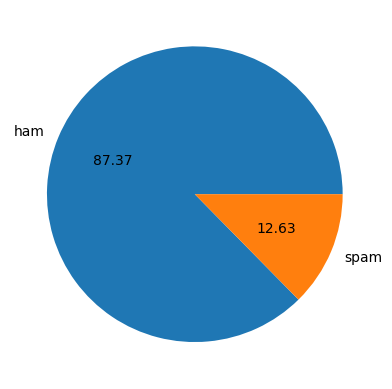

In [174]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts() , labels = ['ham', 'spam'] , autopct = "%0.2f")   #ploting it by matplotlib
plt.show()

In [175]:
import nltk 
nltk.download('stopwords')# natural language tool kit lib used for processing natural language 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shrishmishra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [176]:
nltk.download('punkt')
nltk.download('punkt_tab') 

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shrishmishra/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/shrishmishra/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [177]:
df['num_characters'] = df['text'].apply(len)  # gives us the number of characters in a particular message

In [178]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [179]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))   # this will break all the message in words and store it in list

In [180]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [181]:
df['num_sent'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x))) # breaks message into sentences by using sent_tokenize

In [182]:
df.head()

,target,text,num_characters,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [183]:
df[['num_characters' , 'num_words' , 'num_sent']].describe()

,num_characters,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [184]:
df[df['target' ]== 0][['num_characters' , 'num_words' , 'num_sent']].describe()  # geting info on ham messages only

,num_characters,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [185]:
df[df['target' ]== 1][['num_characters' , 'num_words' , 'num_sent']].describe()  #getting infor on spam messages only

,num_characters,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [186]:
import seaborn as sns  # for plotting the data

<Axes: xlabel='num_characters', ylabel='Count'>

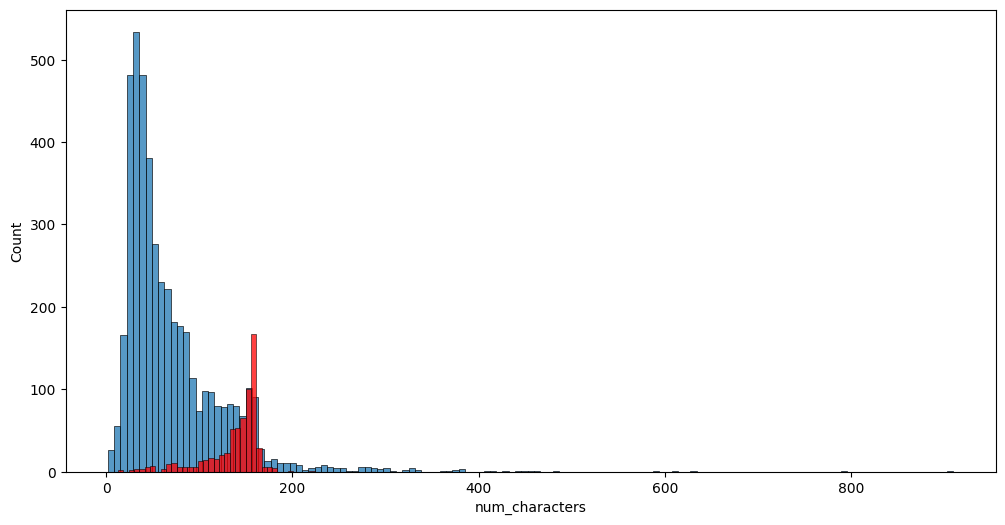

In [187]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'] , color  = 'red')  # plot the histogram on characters of ham and spam messages

<Axes: xlabel='num_words', ylabel='Count'>

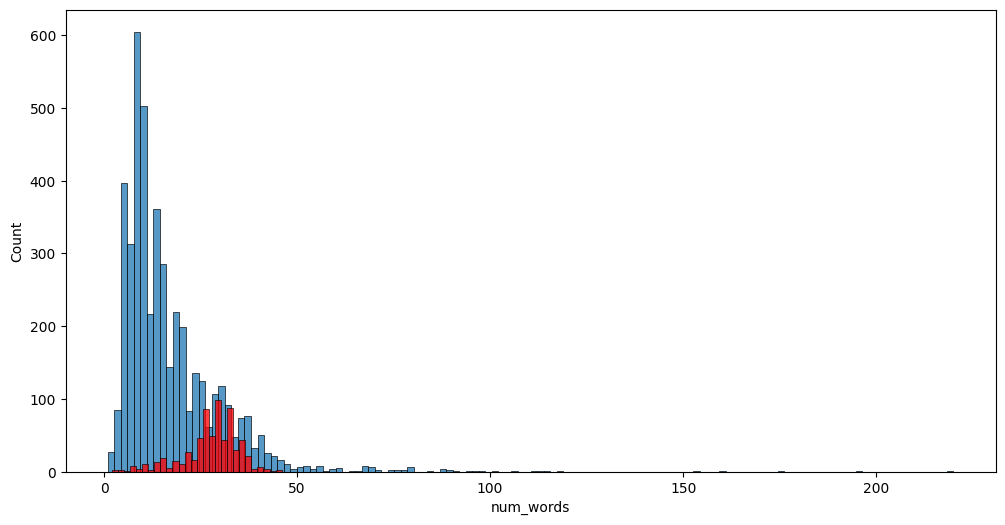

In [188]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'] , color  = 'red')  # plot the histogram on words of ham and spam messages

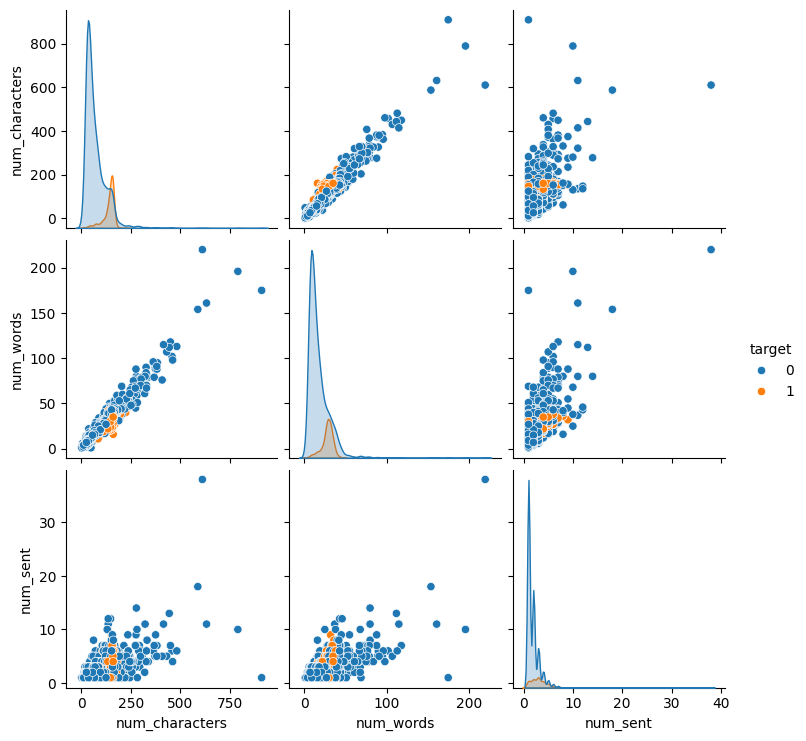

In [189]:
sns.pairplot(df , hue = 'target')

<Axes: >

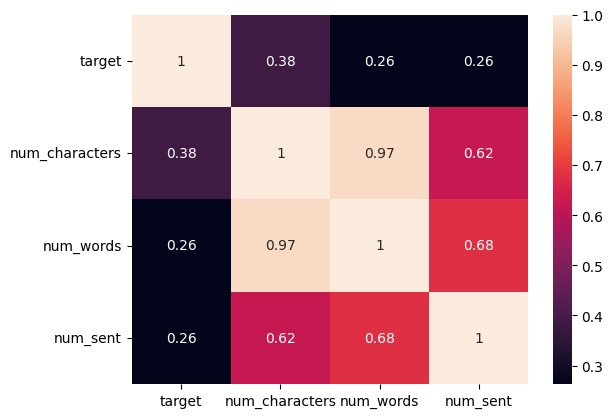

In [190]:
sns.heatmap(df.corr(numeric_only=True),annot= True)  # this is the correlation graph of all the catagories with target 
# we can see that num_character has a high correlation of target 1 and hence we num_character chose it to create our model

In [191]:
 # DATA PREPROCESSING 

In [192]:
def transform_text(text):
       # convert to lower case
    text = text.lower()   
    text = nltk.word_tokenize(text)
    
    #remove special character
    y = []
    for i in text :
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

    # find stopwords and remove it
    from nltk.corpus import stopwords
    import string
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()

    # making all the letters to its root form ( dancing , danced , dance -> danc )
    from nltk.stem.porter import PorterStemmer
    ps = PorterStemmer()
    ps.stem('loving')
    for i in text :
       y.append(ps.stem(i))
    return " ".join(y)

In [193]:
transform_text(" I loved yt lecture on machine learning, how about you? ")

'love yt lectur machin learn'

In [194]:
df['transformed_text'] = df['text'].apply(transform_text)  # applied all the transformations to the whole text

In [195]:
#Now we will generate word clouds where all the important words are highlighted


In [196]:
from wordcloud import WordCloud
wc = WordCloud(width = 500 , height = 500 , min_font_size = 10 , background_color = 'white')

In [197]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = ''))

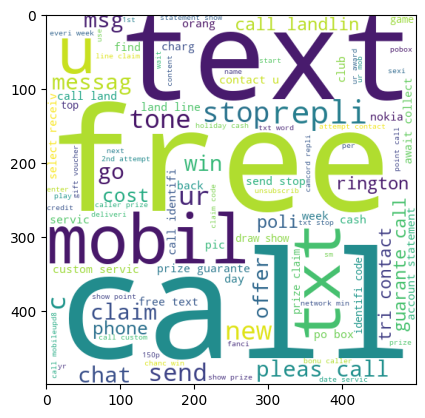

In [198]:
plt.imshow(spam_wc)

In [199]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = ''))

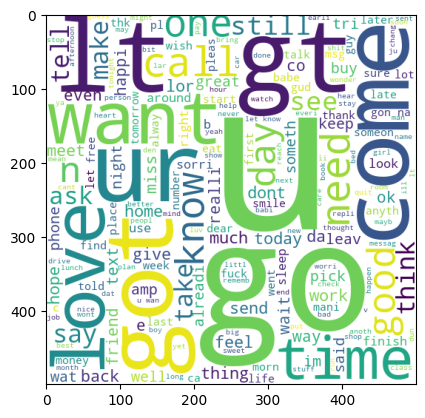

In [200]:
plt.imshow(spam_wc)

In [201]:
df['target'] == 1

0       False
1       False
2        True
3       False
4       False
        ...  
5567     True
5568    False
5569    False
5570    False
5571    False
Name: target, Length: 5169, dtype: bool

In [202]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist() : 
    for word in msg.split():
        spam_corpus.append(word)   # finding the number of words in spam list

In [203]:
len(spam_corpus)

9939

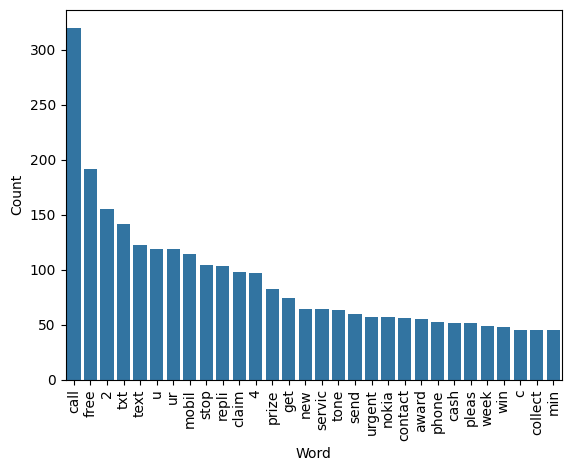

In [204]:
from collections import Counter
word_freq = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Count']) 
 # this will give us top 30 words from spam messages which is stored in spam_corpus by using barplot
# Plot using keyword arguments
sns.barplot(x='Word', y='Count', data=word_freq)
plt.xticks(rotation='vertical')
plt.show()

In [205]:
# MODEL BUILDING 
# we will use bag of words concept and vectorize our data according to it and then use Naive Bayes model

In [206]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()   # both Converts a collection of text documents into a matrix of token counts (word frequencies).
tfidf = TfidfVectorizer(max_features = 3000)  # but we use tfidf to get a more precision score

In [207]:
X = tfidf.fit_transform(df['transformed_text']).toarray()  # we will transform all the ords to number 

In [208]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [209]:
y = df['target'].values

In [210]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [211]:
from sklearn.model_selection import train_test_split

In [212]:
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size = 0.2 , random_state = 2) # spliting the data in test and train

In [213]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score , confusion_matrix, precision_score

In [214]:
gnb = GaussianNB()   # three variants of the Naive Bayes algorithm, each designed for different types of data.
mnb = MultinomialNB()
bnb = BernoulliNB()

In [215]:
gnb.fit(X_train,y_train)    # this will give us all the different types of score
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test , y_pred1))
print(confusion_matrix(y_test , y_pred1))
print(precision_score(y_test , y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [216]:
mnb.fit(X_train,y_train)    # this will give us all the different types of score
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test , y_pred2))   # since mnb is giving us the highest precison score we will use it for our model
print(confusion_matrix(y_test , y_pred2))
print(precision_score(y_test , y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [217]:
bnb.fit(X_train,y_train)    # this will give us all the different types of score
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test , y_pred3))
print(confusion_matrix(y_test , y_pred3))
print(precision_score(y_test , y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [218]:
 # tfidf -> MSB

In [219]:
# Now we will compare all the models performance with each other

In [220]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [221]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [222]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
}

In [223]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [224]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [225]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9274661508704062
Precision -  0.8118811881188119
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.9245647969052224
Precision -  0.8488372093023255
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192


In [226]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [227]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217
6,AdaBoost,0.924565,0.848837
3,DT,0.927466,0.811881


In [228]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,GBDT,Accuracy,0.946809
7,BgC,Accuracy,0.958414
8,AdaBoost,Accuracy,0.924565
9,DT,Accuracy,0.927466


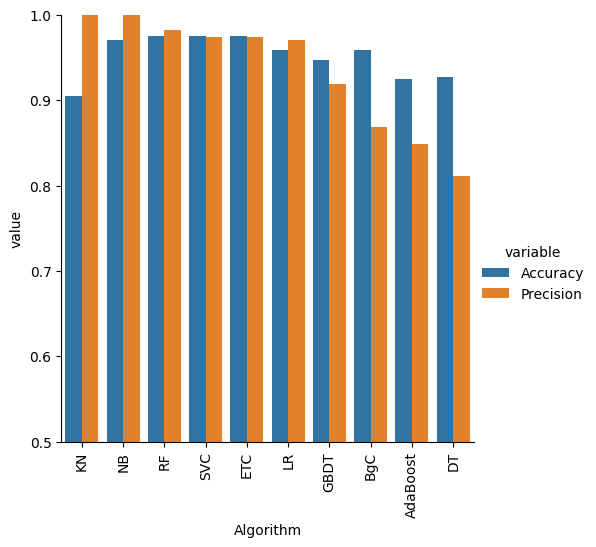

In [229]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [230]:
import pickle 
pickle.dump(tfidf, open('vectorizer.pkl' , 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))